In [1]:
import pandas as pd
import numpy as np
import dawid_skene

In [2]:
data=pd.read_csv('../filter_four.csv', names = ['pid','uid','valence','arousal','dominance','likeness'],
                dtype = {'pid':int, 'uid':int, 'valence':float, 'arousal':float, 'dominance': float, 'likeness': float});
worker=data['uid'].unique()

In [3]:
def category_map(x):
    if x<3.5:
        return 0
    elif x>=3.5 and x<=4.5:
        return 1
    else :
        return 2

for attribute in ['valence']:
    data['mapped_category']=data[attribute].map(category_map)
    data_dict=dict(data.groupby(['pid']).apply(lambda x: dict(x[['uid','mapped_category']].apply(lambda e: (e[0],[e[1]]), axis =1).values)))
    (patients, observers, _, _, class_marginals, error_rates, _) = dawid_skene.run(data_dict)
    accuracy=dict()
    for uid, confusion_matrix in zip(observers, error_rates):
        accuracy[uid] = np.dot(class_marginals, np.diag(confusion_matrix))            

num Patients: 11038
num Observers: 2039
Classes: [0, 1, 2]
Iter	log-likelihood	delta-CM	delta-ER
1 	 -27217.5544346
2 	 -26193.1691093 	0.007736	0.043228
3 	 -25688.3651392 	0.005456	0.027763
4 	 -25409.8297565 	0.004670	0.018197
5 	 -25250.3856284 	0.003809	0.012182
6 	 -25152.7125935 	0.003050	0.008547
7 	 -25089.4783771 	0.002495	0.006226
8 	 -25047.5857018 	0.002059	0.004712
9 	 -25018.4112592 	0.001687	0.003607
10 	 -24997.1663861 	0.001378	0.002837
11 	 -24981.3527397 	0.001132	0.002308
12 	 -24968.9002452 	0.000938	0.002059
13 	 -24958.7408219 	0.000795	0.001858
14 	 -24949.9325339 	0.000684	0.001500
15 	 -24942.2209173 	0.000611	0.001366
16 	 -24936.363393 	0.000514	0.001119
17 	 -24931.1309876 	0.000426	0.001094
18 	 -24926.4297184 	0.000363	0.000918
19 	 -24921.914819 	0.000312	0.000893
20 	 -24917.8925583 	0.000280	0.000952
21 	 -24915.0719548 	0.000259	0.000720
22 	 -24912.9394542 	0.000227	0.000579
23 	 -24911.1980346 	0.000198	0.000582
24 	 -24909.7903282 	0.000176	0.0004

In [4]:
spammers=set(np.loadtxt('../spammers.txt', dtype='int'))
labels = [x in spammers for x in worker]
predictions = [1-accuracy[x] for x in worker]

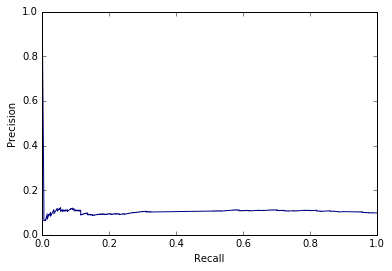

In [5]:
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt
%matplotlib inline
precision, recall, _ = precision_recall_curve(labels, predictions)
plt.clf()
plt.plot(recall, precision, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [6]:
ds_acc = pd.DataFrame()
ds_acc['acc']=predictions
ds_acc['uid']=accuracy.keys()
ds_acc.to_csv('DS_acc.csv', index=False)

In [48]:
duration=pd.read_csv('Duration.csv', names=['pid','uid','imageDuration','surveyDuration'],delimiter='\t', dtype=int)
duration_dict=dict(duration.groupby('uid').apply(lambda x: x['imageDuration'].mean() + x['surveyDuration'].mean()))
duration_dict1=dict(duration.groupby('uid').apply(lambda x: x['imageDuration'].mean() ))
duration_dict2=dict(duration.groupby('uid').apply(lambda x: x['surveyDuration'].mean() ))
count_dict=dict(duration.groupby('uid')['uid'].count())

In [4]:
spammers=set(np.loadtxt('../spammers.txt', dtype='int'))
labels = [x in spammers for x in worker]
predictions_duration = [duration_dict[x] for x in worker]

In [33]:
worker[np.array(predictions_duration) < 5000]

array([3129,  540, 2912])

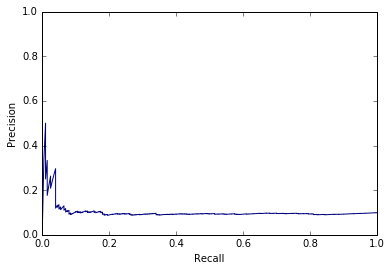

In [20]:
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt
%matplotlib inline
precision, recall, _ = precision_recall_curve(labels, predictions_duration)
plt.clf()
plt.plot(recall, precision, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [34]:
duration_avg = pd.DataFrame()
duration_avg['duration']=predictions_duration
duration_avg['uid']=worker
duration_avg.to_csv('duration_avg.csv', index=False)

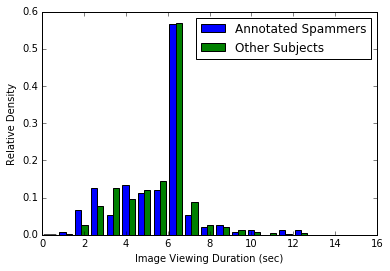

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([[duration_dict1[x]/1000 for x in spammers],[duration_dict1[x]/1000 for x in worker if x not in spammers]], 20, range=(0,15), normed=1)
plt.xlabel('Image Viewing Duration (sec)')
plt.ylabel('Relative Density')
plt.legend(['Annotated Spammers', 'Other Subjects'])
plt.savefig('image_view_duration_hist.pdf')

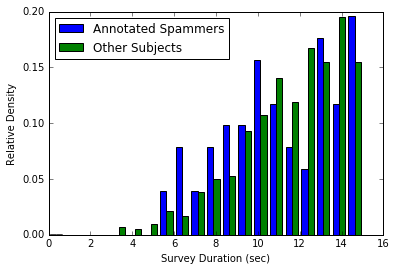

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([[duration_dict2[x]/1000 for x in spammers],[duration_dict2[x]/1000 for x in worker if x not in spammers]], 20, range=(0,15), normed=1)
plt.xlabel('Survey Duration (sec)')
plt.ylabel('Relative Density')
plt.legend(['Annotated Spammers','Other Subjects'], loc='upper left')
plt.savefig('survey_duration_hist.pdf')

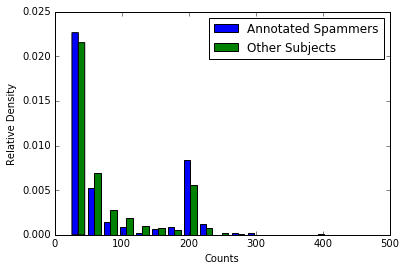

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([[count_dict[x] for x in spammers],[count_dict[x] for x in worker if x not in spammers]], 20, normed=1)
plt.xlabel('Counts')
plt.ylabel('Relative Density')
plt.legend(['Annotated Spammers','Other Subjects'])
plt.savefig('task_count_hist.pdf')